In [52]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Download latest version
path = "https://raw.githubusercontent.com/YaroslawBagriy/SEIS-632-Project-2/refs/heads/main/project2data.txt"
df = pd.read_csv(path)

%matplotlib inline
sns.set(color_codes=True)

df.head()
df.dtypes

df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [53]:
# Display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [54]:
# To display the botton 5 rows
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [55]:
# Check the types of data
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [56]:
# Dropping irrelevant columns
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


In [57]:
# Renaming the columns
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


In [58]:
# Dropping the duplicate rows

df.shape
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

# Used to count the number of rows
df.count()

df = df.drop_duplicates()
df.head(5)

number of duplicate rows:  (989, 11)


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


In [59]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Popularity      10925
Price           10925
dtype: int64

In [60]:
# Dropping the missing or null values.
print(df.isnull().sum())

# Dropping the missing values.
df = df.dropna()
df.count()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Popularity      10827
Price           10827
dtype: int64

In [61]:
# After dropping the values
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Popularity      0
Price           0
dtype: int64


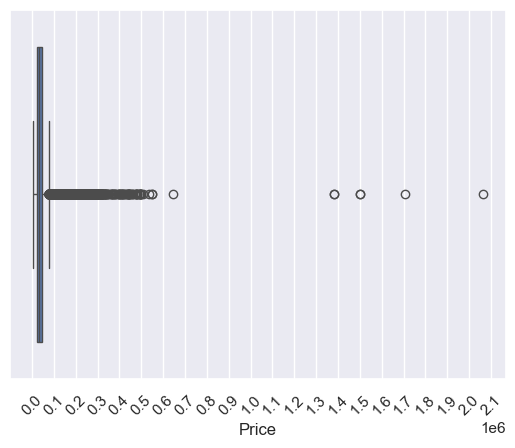

In [62]:
# Detecting Outliers
sns.boxplot(x=df['Price'])

# Set x-axis ticks in 100K increments
plt.xticks(ticks=range(0, int(df['Price'].max()) + 100000, 100000), rotation=45)
plt.show()

<Axes: xlabel='HP'>

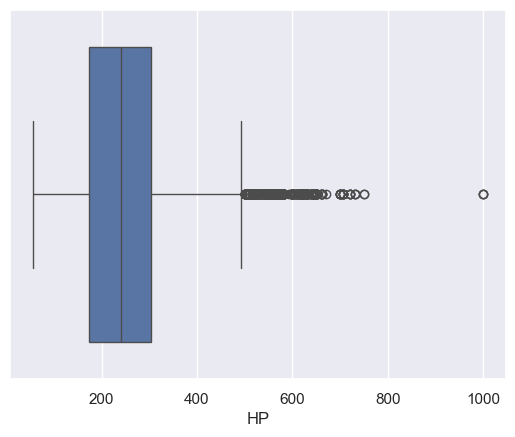

In [63]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

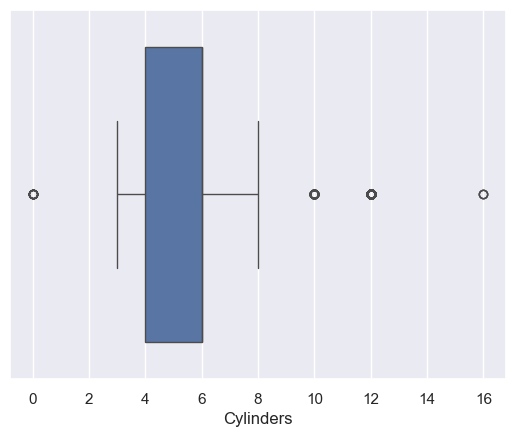

In [64]:
sns.boxplot(x=df['Cylinders'])

In [65]:
# Select only numeric columns for calculating quantiles and IQR
numeric_df = df.select_dtypes(include=[float, int])

# Calculate Q1, Q3, and IQR on the numeric DataFrame
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter the original DataFrame using the numeric DataFrame's IQR mask
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)


(8438, 11)


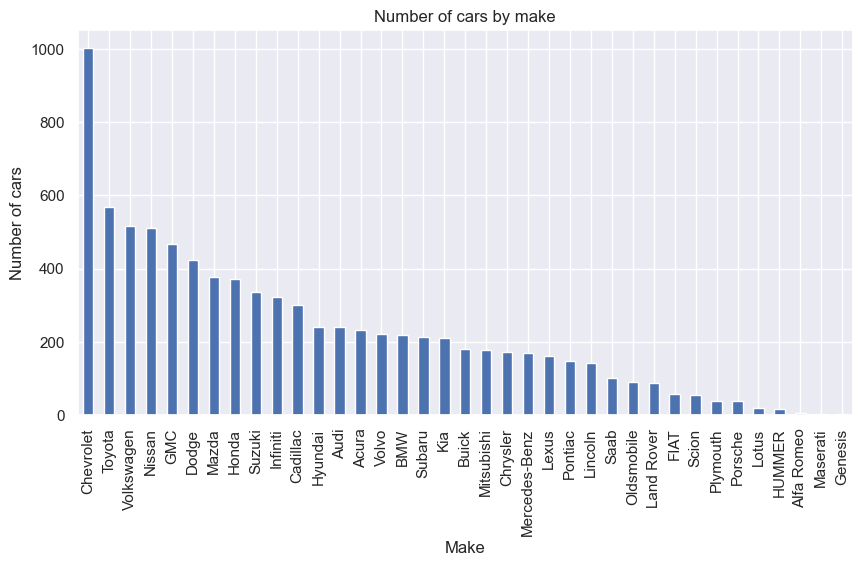

In [66]:
# Plot different features against one another (scatter), against frequency (histogram)

# Histogram
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

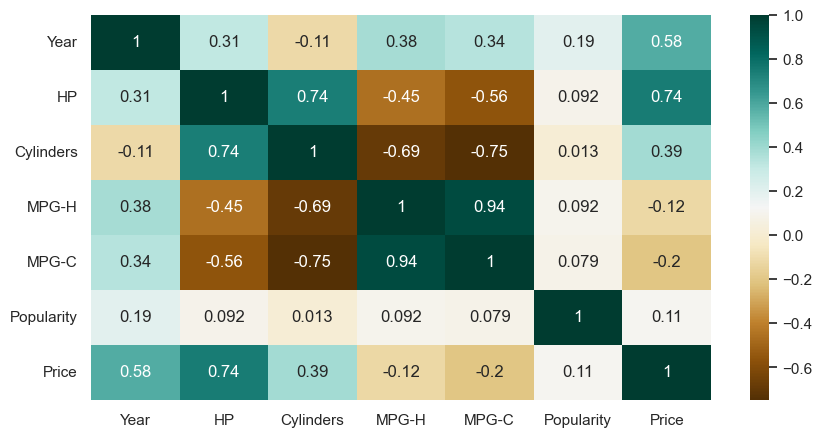

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.314687,-0.114560,0.379871,0.339894,0.194792,0.577544
HP,0.314687,1.000000,0.736268,-0.454730,-0.557035,0.092237,0.744946
Cylinders,-0.114560,0.736268,1.000000,-0.692258,-0.747238,0.012965,0.390584
MPG-H,0.379871,-0.454730,-0.692258,1.000000,0.937019,0.092447,-0.123900
MPG-C,0.339894,-0.557035,-0.747238,0.937019,1.000000,0.079140,-0.201820
Popularity,0.194792,0.092237,0.012965,0.092447,0.079140,1.000000,0.108194
Price,0.577544,0.744946,0.390584,-0.123900,-0.201820,0.108194,1.000000


In [67]:
# First filter for numeric columns 
# Calculate correlation matrix
c = df.select_dtypes(include=[float, int]).corr()

# Plot heatmap
plt.figure(figsize=(10,5))
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()
c

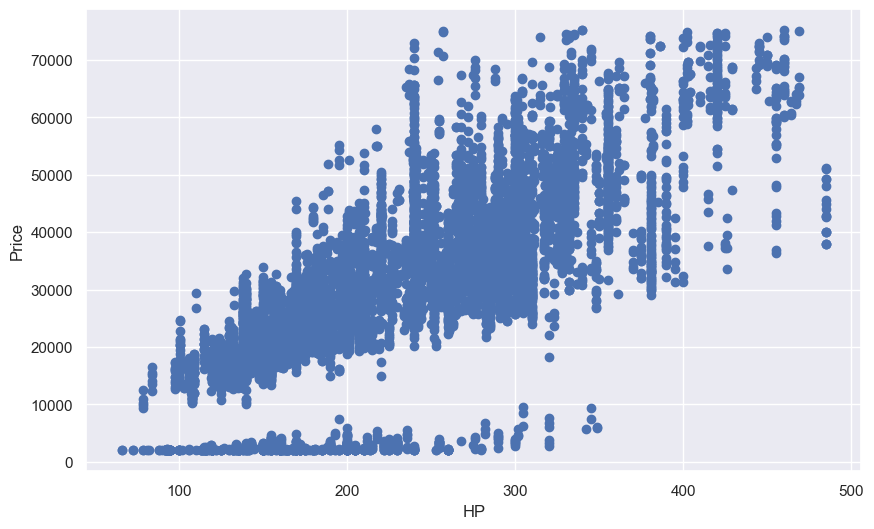

In [68]:
# Scatterplot

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
ax.get_yaxis().get_major_formatter().set_scientific(False)  # Disable scientific notation on y-axis

# TODO: Add Linear Regression
plt.show()

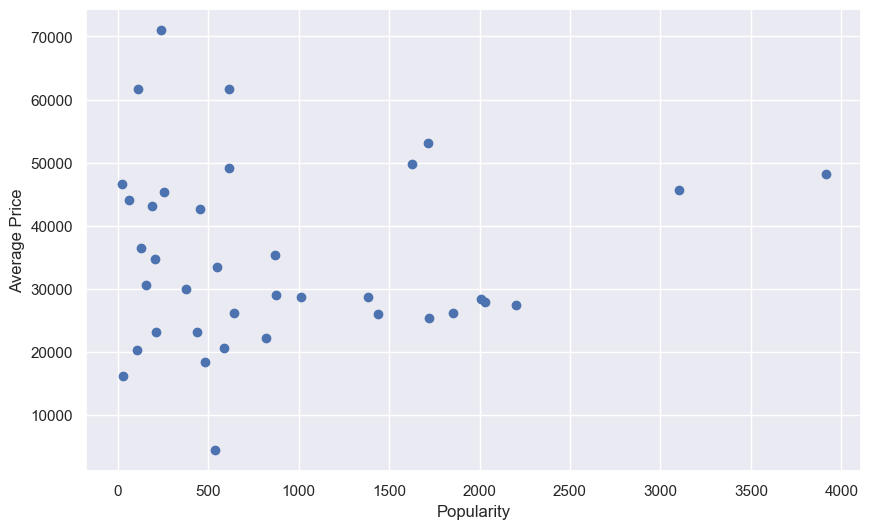

In [69]:
# Average Price vs Popularity

# Split the data by Popularity
year_data = df.groupby('Popularity')

# Pull out price column
price_column = year_data['Price']

# Calculate mean
yearly_avg_price = price_column.mean()

# Plot Bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(yearly_avg_price.index, yearly_avg_price.values)
ax.set_xlabel('Popularity')
ax.set_ylabel('Average Price')

# Disable scientific notation on y-axis
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

# Almost no correlation between popularity and price

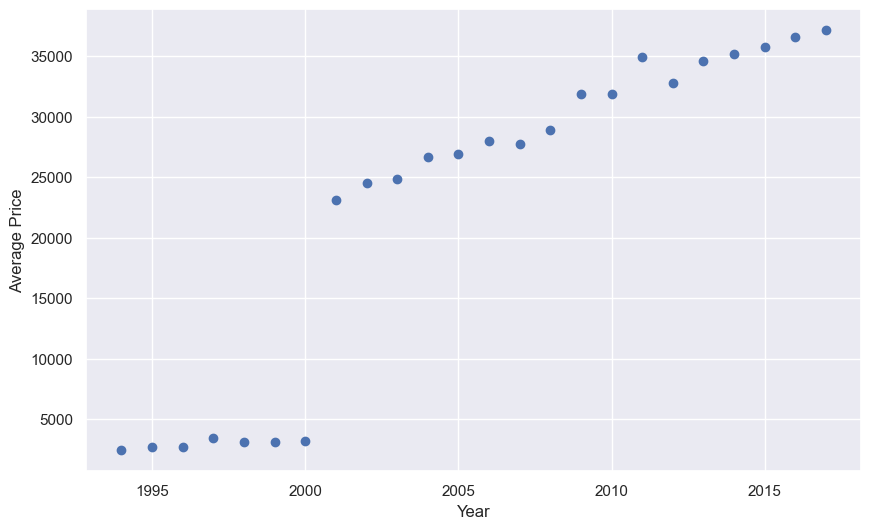

In [70]:
# Average Price vs Year

# Are cars getting more expensive over the years?

# Split the data by Year
year_data = df.groupby('Year')

# Pull out price column
price_column = year_data['Price']

# Calculate mean
yearly_avg_price = price_column.mean()

# Plot Bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(yearly_avg_price.index, yearly_avg_price.values)
ax.set_xlabel('Year')
ax.set_ylabel('Average Price')

# Disable scientific notation on y-axis
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

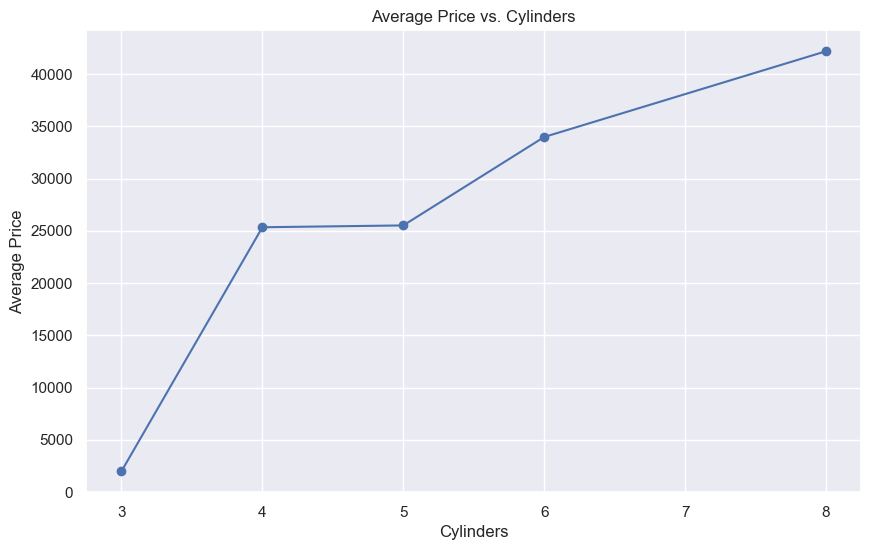

In [71]:
# Average Price vs Cylindars

# Calculate average price per cylinder count
cylinder_data_group = df.groupby('Cylinders')

# Pull out price column
price_column = cylinder_data_group['Price']

# Calculate mean
average_price_per_cylinder = price_column.mean()

# Plot the result
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(average_price_per_cylinder.index, average_price_per_cylinder.values, marker='o', linestyle='-')
ax.set_xlabel('Cylinders')
ax.set_ylabel('Average Price')
ax.get_yaxis().get_major_formatter().set_scientific(False)  # Disable scientific notation on y-axis
plt.title('Average Price vs. Cylinders')
plt.show()

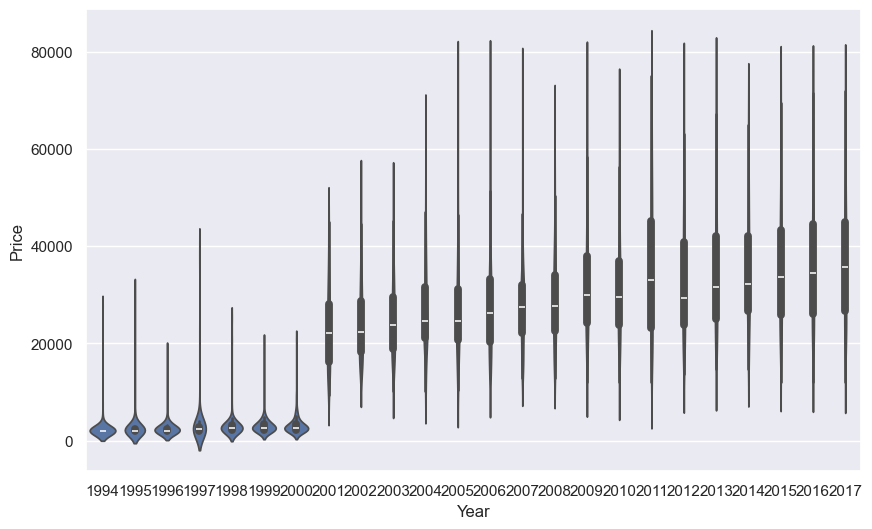

In [72]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(x='Year', y='Price', data=df, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.show()

### Convert catagorical data into numpy array
- Booleans are regarded as numbers 0 or 1

In [73]:
import numpy as np

# Turn 'Make' column into an array of strings
make = df["Make"].to_numpy()
make_unique = np.unique(make)
# Turn array of strings to a 2D array of booleans
make_tf_labels = np.array([x == np.array(make_unique) for x in make])

model = df["Model"].to_numpy()
model_unique = np.unique(model)
model_tf_labels = np.array([x == np.array(model_unique) for x in model])

transmission = df["Transmission"].to_numpy()
transmission_unique = np.unique(transmission)
transmission_tf_labels = np.array([x == np.array(transmission_unique) for x in transmission])

drive_Mode = df["Drive Mode"].to_numpy()
drive_Mode_unique = np.unique(drive_Mode)
drive_Mode_tf_labels = np.array([x == np.array(drive_Mode_unique) for x in drive_Mode])
# See what it looks like 
drive_Mode_tf_labels

array([[False, False, False,  True],
       [False, False, False,  True],
       [False, False, False,  True],
       ...,
       [ True, False, False, False],
       [ True, False, False, False],
       [False, False,  True, False]])

In [74]:
# Convert boolean values to integers
df["Make"] = make_tf_labels.astype(int)
df["Model"] = model_tf_labels.astype(int)
df["Transmission"] = transmission_tf_labels.astype(int)
df["Drive Mode"] = drive_Mode_tf_labels.astype(int)
# df.dtypes

In [75]:
# numeric_cols = df.select_dtypes(include=[np.number]) -> Only numeric columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("-------IRQ\n", IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print("-------Outliers\n", outliers.head(10))

-------IRQ
 Make                0.0
Model               0.0
Year                8.0
HP                117.0
Cylinders           2.0
Transmission        0.0
Drive Mode          0.0
MPG-H               8.0
MPG-C               6.0
Popularity       1302.0
Price           18032.5
dtype: float64
-------Outliers
    Make  Model  Year     HP  Cylinders  Transmission  Drive Mode  MPG-H  \
0     0      0  2011  335.0        6.0             0           0     26   
1     0      1  2011  300.0        6.0             0           0     28   
2     0      1  2011  300.0        6.0             0           0     28   
3     0      1  2011  230.0        6.0             0           0     28   
4     0      1  2011  230.0        6.0             0           0     28   
5     0      1  2012  230.0        6.0             0           0     28   
6     0      1  2012  300.0        6.0             0           0     26   
7     0      1  2012  300.0        6.0             0           0     28   
8     0      1  2

In [76]:
df.describe()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Popularity,Price
count,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000,8438.000000
mean,19.465395,1209.432211,0.115312,235.545508,5.382555,31188.020265,0.215572,0.419175,0.249941,2011.393458,26.728490
std,4.336031,866.215405,0.319417,76.887917,1.377924,15026.125060,0.411243,0.493453,0.433004,6.195309,5.648645
min,10.000000,21.000000,0.000000,66.000000,3.000000,2000.000000,0.000000,0.000000,0.000000,1994.000000,13.000000
25%,16.000000,549.000000,0.000000,173.000000,4.000000,22066.250000,0.000000,0.000000,0.000000,2008.000000,23.000000
50%,19.000000,1013.000000,0.000000,230.000000,6.000000,29995.000000,0.000000,0.000000,0.000000,2015.000000,26.000000
75%,22.000000,1851.000000,0.000000,290.000000,6.000000,40098.750000,0.000000,1.000000,0.000000,2016.000000,31.000000
max,31.000000,3916.000000,1.000000,485.000000,8.000000,75200.000000,1.000000,1.000000,1.000000,2017.000000,42.000000
